In [1]:

import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.layers import Conv2D,Dense,MaxPooling2D,Concatenate,BatchNormalization,Activation
from keras.layers import Flatten,Dense,Reshape,Rescaling
from keras.models import Model
import seaborn as sns
import matplotlib.pyplot as plt

2024-04-26 14:11:34.575147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 14:11:34.784492: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-26 14:11:39.509766: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/uiet/catkin_ws/devel/lib:/opt/ros/noetic/lib:/usr/local/cuda-11.6/lib64:/usr/lib/x86_64-linu

In [2]:
def inception_module(x,f1,f2,f3):
    conv1 = Conv2D(f1,kernel_size = (1,1),padding='same',activation='relu')
    conv3 = Conv2D(f2,kernel_size= (3,3) , padding = "same" , activation='relu')
    conv5 = Con2D(f3,kernel_size=(5,5), padding='same',activation='relu')
    maxpooling = MaxPooling((3,3), strides =(1,1), padding='same')
    output = Concatenate([conv1,conv3,conv5,pool])
    return output

In [3]:
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Concatenate, Rescaling, Flatten, Dense

from keras.models import Model

from keras import regularizers

​

​

img_inputs = Input(shape=(512, 512, 3))

resize_and_rescale = Rescaling(1./255)(imdef Conv2D_bn(x,filters,f_w,f_h,padding="same",strides=(1,1)):
    x = Conv2D(filters,kernel_size =(f_w,f_h),padding=padding,strides=strides)(x)
    x = BatchNormalization(axis=3,scale=False)(x)
    x = Activation("relu")(x)
    return x
    

In [76]:
img_input = Input(shape=(512,512,3))

In [77]:
x = Conv2D_bn(img_input,32,3,3,strides=(2,2),padding='valid')
x = Conv2D_bn(x,32,1,1)
x = Conv2D_bn(x,64,1,1)
maxpooling1 = MaxPooling2D((3,3),strides=(2,2), padding='same')(x)
x = Conv2D_bn(x,80,1,1)
x = Conv2D_bn(x,192,3,3)
maxpooling2 = MaxPooling2D((3,3),strides=(2,2), padding='same')(x)
x = inc_block_a(x)
x = inc_block_a(x)
x = inc_block_a(x)


2024-04-26 14:07:24.760013: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 540.0KiB (rounded to 552960)requested by op AddV2
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-04-26 14:07:24.760113: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2024-04-26 14:07:24.760131: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 639, Chunks in use: 639. 159.8KiB allocated for chunks. 159.8KiB in use in bin. 102.2KiB client-requested in use in bin.
2024-04-26 14:07:24.760146: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 156, Chunks in use: 156. 86.2KiB allocated for chunks. 86.2KiB in use in bin. 68.4KiB client-requested in use in bin.
2024-04-26 14:07:24.760161: I tensorflow/tsl/framew

ResourceExhaustedError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:AddV2]

In [ ]:
def inc_block_a(x):
    branch1x1 = Conv2D_bn(x,64,1,1)
    branch3x3 = Conv2D_bn(x,48,1,1)
    branch3x3 = Conv2D_bn(branch3x3,48,3,3)
    bracnh3x3dbl = Conv2D_bn(x,64,1,1)
    bracnh3x3dbl = Conv2D_bn(bracnh3x3dbl,96,3,3)
    maxpooling = MaxPooling2D((3,3),strides=(1,1),padding='same')
    maxpooling = Conv2D_bn(maxpooling,32,1,1)
    output = Concatenate([branch1x1,branch3x3,bracnh3x3dbl,maxpooling], axis = 3)
    return output
    

In [2]:
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Concatenate, Rescaling, Flatten, Dense
from keras.models import Model
from keras import regularizers


img_inputs = Input(shape=(512, 512, 3))
resize_and_rescale = Rescaling(1./255)(img_inputs)

def Conv2D_bn(x, filters, f_w, f_h, padding="same", strides=(1,1)):
    x = Conv2D(filters, kernel_size=(f_w, f_h), padding=padding, strides=strides)(x)
    x = BatchNormalization(axis=3, scale=False)(x)
    x = Activation("relu")(x)
    return x

def inc_block_a(x):
    branch1x1 = Conv2D_bn(x, 64, 1, 1)
    branch3x3 = Conv2D_bn(x, 48, 1, 1)
    branch3x3 = Conv2D_bn(branch3x3, 48, 3, 3)
    branch3x3dbl = Conv2D_bn(x, 64, 1, 1)
    branch3x3dbl = Conv2D_bn(branch3x3dbl, 96, 3, 3)
    maxpooling = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    maxpooling = Conv2D_bn(maxpooling, 32, 1, 1)
    output = Concatenate()([branch1x1, branch3x3, branch3x3dbl, maxpooling])
    return output

x = Conv2D_bn(resize_and_rescale, 32, 3, 3, strides=(2, 2), padding='valid')
x = Conv2D_bn(x, 32, 1, 1)
x = Conv2D_bn(x, 64, 1, 1)
maxpooling1 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = Conv2D_bn(maxpooling1, 80, 1, 1)
x = Conv2D_bn(x, 192, 3, 3)
maxpooling2 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = inc_block_a(maxpooling2)
x = inc_block_a(x)
x = inc_block_a(x)
x = Conv2D(128,kernel_size=(1,1),kernel_regularizer=regularizers.L2(0.04),activation='relu')(x)
x = Conv2D(64,kernel_size=(1,1), kernel_regularizer=regularizers.L2(0.04),activation='relu',padding='same')(x)
x = Conv2D(32,kernel_size=(1,1),activation='relu', kernel_regularizer=regularizers.L2(0.03),padding='same')(x)
x = Conv2D(16,kernel_size=(1,1),kernel_regularizer=regularizers.L2(0.03),activation='relu',padding='same')(x)
x = Conv2D(8,kernel_size=(1,1),kernel_regularizer=regularizers.L2(0.04),activation='relu',padding='same')(x)
x  = Flatten()(x)
x = Dense(1000, activation='relu')(x)
x = Dense(200, activation='relu')(x)
predictions = Dense(1, activation='softmax')(x)
Dr_base_network = Model(inputs=img_inputs, outputs=predictions)
Dr_base_network.summary()


2024-05-03 10:31:05.288498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 10:31:06.780425: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-03 10:31:12.624907: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/uiet/catkin_ws/devel/lib:/opt/ros/noetic/lib:/usr/local/cuda-11.6/lib64:/usr/lib/x86_64-linu

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 512, 512, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  896         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 64, 64, 48)  144         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 64, 64, 96)  288         ['conv2d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 64, 64, 32)  96          ['conv2d_10[0][0]']              
 ormalization)                                                                                    
          

 activation_18 (Activation)     (None, 64, 64, 48)   0           ['batch_normalization_18[0][0]'] 
                                                                                                  
 activation_20 (Activation)     (None, 64, 64, 64)   0           ['batch_normalization_20[0][0]'] 
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 64, 64, 240)  0          ['concatenate_1[0][0]']          
                                                                                                  
 conv2d_17 (Conv2D)             (None, 64, 64, 64)   15424       ['concatenate_1[0][0]']          
                                                                                                  
 conv2d_19 (Conv2D)             (None, 64, 64, 48)   20784       ['activation_18[0][0]']          
                                                                                                  
 conv2d_21

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
PATH = "./images_resized_512"
dataset = image_dataset_from_directory(
    PATH,
    image_size=(512, 512),
    seed=123,
    shuffle=True,
    batch_size=64,
    follow_links=True
)
print(dataset)

Found 43066 files belonging to 2 classes.
<BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


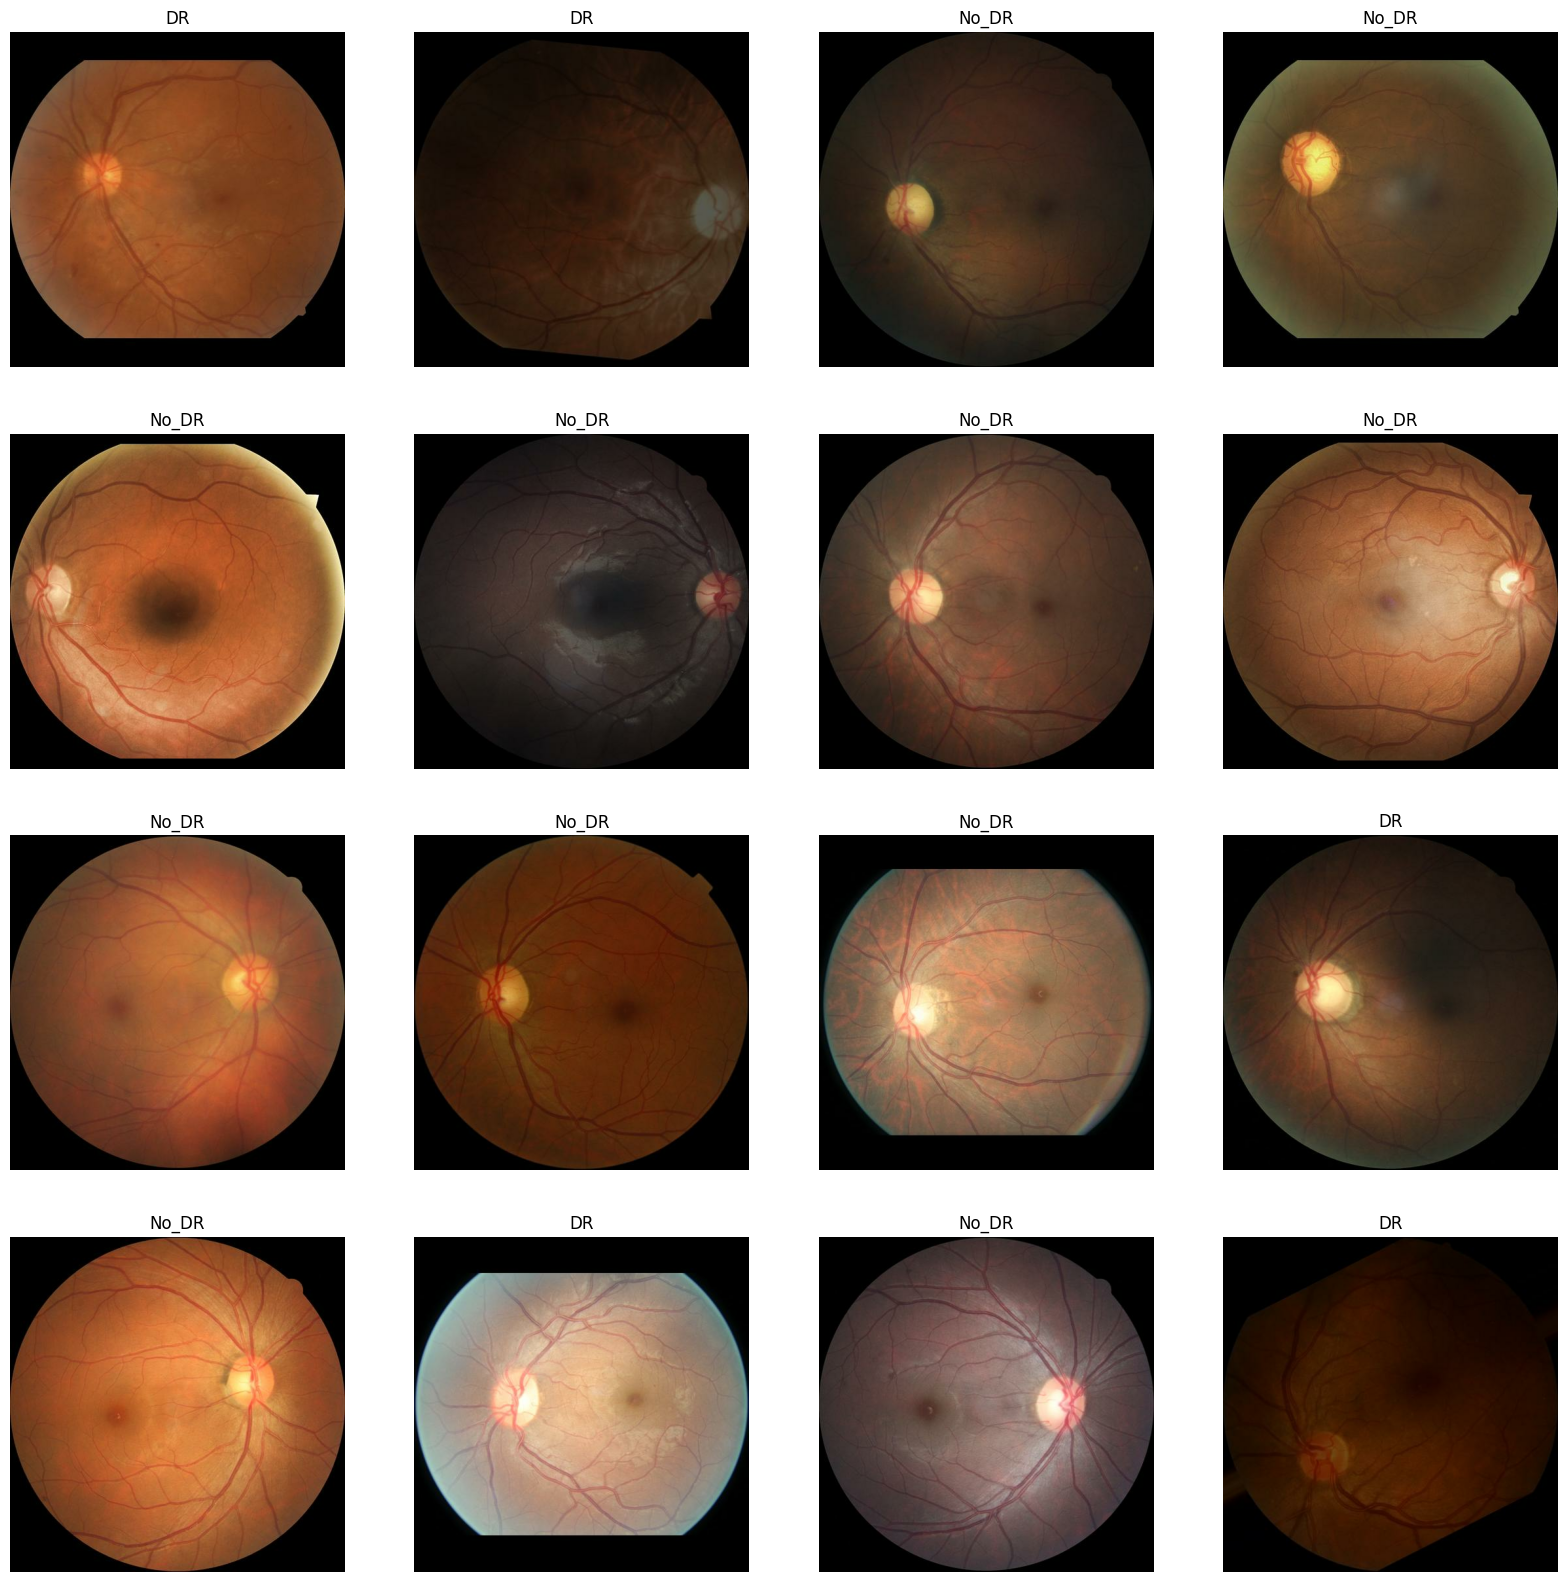

In [4]:
plt.figure(figsize=(20,20))
binary_classes = ['No_DR','DR']
for image,label in dataset.take(1):
    for i in range(16):
        ax =plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(binary_classes[label[i]])
        plt.axis("off")


In [5]:
# spliting the binary classification images into training , validation and test dataset
def datasets_partition(data,train_split=0.6,val_split=0.2,test_split=0.2,shuffle=True,shufflesize=30):
    data_size = len(data)
    if shuffle:
        data = data.shuffle(shufflesize,seed=12)
    train_size=int(data_size*train_split)
    val_size = int(data_size*val_split)
    test_size = int(data_size*test_split)
    train_data = data.take(train_size)
    test_val_data = data.skip(train_size)
    val_data = test_val_data.take(val_size)
    test_data = test_val_data.skip(val_size)
    return train_data,val_data,test_data

In [6]:
train_data,val_data,test_data = datasets_partition(dataset)
print(len(train_data))
print(len(val_data))
print(len(test_data))

403
134
136


In [8]:
BATCH_SIZE = 64
import pickle

In [9]:
Dr_base_network.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('dr_model_best_weights_inception2.h5',
                            monitor='val_accuracy',
                            save_best_only=True,
                            save_weights_only=True,
                            mode ='max',
                            verbose=1
                            )
history = Dr_base_network.fit(
    train_data,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_data,
    epochs=100,
    callbacks = [checkpoint]
)
with open("base_network.pickle",'wb') as file_pi:
    pickle.dump(history.history,file_pi)

Epoch 1/100


2024-05-03 10:34:36.801369: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 27 of 30
2024-05-03 10:34:37.923684: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-05-03 10:34:43.979318: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8900
2024-05-03 10:34:51.956885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-05-03 10:34:52.595485: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1ddc2000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-03 10:34:52.595534: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2024-05-03 10:34:52.798996: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling ML

403/403 [==============================] - ETA: 0s - loss: 4.3600 - accuracy: 0.7710
Epoch 1: val_accuracy improved from -inf to 0.58594, saving model to dr_model_best_weights_inception2.h5
403/403 [==============================] - 266s 570ms/step - loss: 4.3600 - accuracy: 0.7710 - val_loss: 1.6574 - val_accuracy: 0.5859
Epoch 2/100
403/403 [==============================] - ETA: 0s - loss: 0.8897 - accuracy: 0.7885
Epoch 2: val_accuracy improved from 0.58594 to 0.79629, saving model to dr_model_best_weights_inception2.h5
403/403 [==============================] - 145s 359ms/step - loss: 0.8897 - accuracy: 0.7885 - val_loss: 0.6755 - val_accuracy: 0.7963
Epoch 3/100
403/403 [==============================] - ETA: 0s - loss: 0.5841 - accuracy: 0.7901
Epoch 3: val_accuracy did not improve from 0.79629
403/403 [==============================] - 144s 356ms/step - loss: 0.5841 - accuracy: 0.7901 - val_loss: 0.5365 - val_accuracy: 0.7957
Epoch 4/100
403/403 [==============================]

Epoch 28/100
403/403 [==============================] - ETA: 0s - loss: 0.1670 - accuracy: 0.9426
Epoch 28: val_accuracy did not improve from 0.81880
403/403 [==============================] - 144s 356ms/step - loss: 0.1670 - accuracy: 0.9426 - val_loss: 0.4864 - val_accuracy: 0.8120
Epoch 29/100
403/403 [==============================] - ETA: 0s - loss: 0.1411 - accuracy: 0.9520
Epoch 29: val_accuracy did not improve from 0.81880
403/403 [==============================] - 144s 356ms/step - loss: 0.1411 - accuracy: 0.9520 - val_loss: 0.6407 - val_accuracy: 0.8032
Epoch 30/100
403/403 [==============================] - ETA: 0s - loss: 0.1044 - accuracy: 0.9693
Epoch 30: val_accuracy improved from 0.81880 to 0.82778, saving model to dr_model_best_weights_inception2.h5
403/403 [==============================] - 145s 358ms/step - loss: 0.1044 - accuracy: 0.9693 - val_loss: 0.6692 - val_accuracy: 0.8278
Epoch 31/100
403/403 [==============================] - ETA: 0s - loss: 0.0762 - accurac

Epoch 56/100
403/403 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9974
Epoch 56: val_accuracy did not improve from 0.83909
403/403 [==============================] - 144s 355ms/step - loss: 0.0233 - accuracy: 0.9974 - val_loss: 1.0029 - val_accuracy: 0.8383
Epoch 57/100
403/403 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9980
Epoch 57: val_accuracy did not improve from 0.83909
403/403 [==============================] - 144s 355ms/step - loss: 0.0202 - accuracy: 0.9980 - val_loss: 1.2895 - val_accuracy: 0.7947
Epoch 58/100
403/403 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9981
Epoch 58: val_accuracy did not improve from 0.83909
403/403 [==============================] - 144s 355ms/step - loss: 0.0195 - accuracy: 0.9981 - val_loss: 1.1812 - val_accuracy: 0.8264
Epoch 59/100
403/403 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 0.9974
Epoch 59: val_accuracy did not improve from 0.8

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history["accuracy"],"r", linewidth=3.0)
plt.plot(history.history["val_accuracy"],"b", linewidth=3.0)
plt.legend(["Training_Acc","Validation_Acc"],fontsize=18)
plt.xlabel("epochs",fontsize=16)
plt.ylabel("accuracy",fontsize=16)

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history["loss"],"r", linewidth=3.0)
plt.plot(history.history["val_loss"],"b", linewidth=3.0)
plt.legend(["Training_Loss","Validation_Loss"],fontsize=18)
plt.xlabel("epochs",fontsize=16)
plt.ylabel("LOSS",fontsize=16)

In [12]:
with open("base_network.pickle",'wb') as file_pi:
    pickle.dump(history.history,file_pi)